perte calculé :  0.005436930507771247


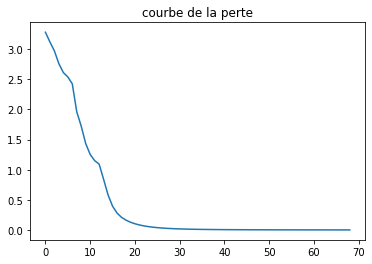

APPRENTISSAGE [ 1  1  1  1  1  2  2  2  3  3  4  4  5  5  5  6  6  7  7  8  8  9  9  9
  9  9 10 10 11 11 12 12 13 13 14 14 15 15 15 16 16 17 17 18 18 19 19 20
 20 21 21 21 22 22 23 23 24 24 25 25 26 26]
DE TEST  [ 1  1  2  2  3 15  4  4  5  5  5  6  7  8  8  9 10 10 10 24 12 13  8 14
 14 15 15 16 16 17 18  2 19 20 21 14 22 23 24 25 26]
cmp est= 62
le taux de reconnaissance est :  100.0 %
le taux de reconnaissance de test est :  82.92682926829268 %


SystemExit: 0

d:\python3.8.6\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QFileDialog
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


#les parametres qui donne une meilleure resultat
#ibfgs,0,001,
cl = MLPClassifier(activation='logistic',solver='sgd',alpha=0.0003,learning_rate_init=0.3,max_iter=1000)

#fonction pour charger les images d'apprentissage et de test 

def apprentissage():
   
    
    
    out=[]
    #les images d'apprentissage
    alphabets=np.array([1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 11, 11, 
                        12, 12, 13, 13,14, 14, 15, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 
                        21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26])
    
    
    for i in range(1,63):
        #lecture des images 
        img="C:/Users/dell/Desktop/master/s2/TAD/tp/tp3/images/apprentissage/".__add__(i.__str__()).__add__(".png")
        img=imread(img)
        # Translation de l’espace des couleurs RGB à l’espace niveaux de gris 
        image=rgb2gray(img)
        # une méthode de seuillage
        thresh = threshold_mean(image)
        binary = image > thresh
        #en utilisant la fonction flatten pour mettre les images dans un tableau monodimensionnel Xi
        binary=binary.flatten() #function return a copy of the array collapsed into one dimension.
        #stocker les images 
        out.append(binary)
    
    cl.fit(out, alphabets)
    print("perte calculé : ", cl.loss_)
    plt.plot(cl.loss_curve_)
    plt.title("courbe de la perte")
    plt.show()
    #Prédiction pour les images d'apprentissage
    y_predA = cl.predict(out)
    print("APPRENTISSAGE",y_predA)
    
    
    
    
    #phase de test 
    alphabetsT= np.array([1,1,2,2,3,3,4,4,5,5,6,6,7,8,8,9,9,10,10,11,12,13,13,14,14,15,15,16,16
                         ,17,18,19,19,20,21,21,22,23,24,25,26])
    test=[]
    for i in range(1,42):    
        img="C:/Users/dell/Desktop/master/s2/TAD/tp/tp3/images/TEST/".__add__(i.__str__()).__add__(".png")
        img=imread(img)
        image=rgb2gray(img)
        thresh = threshold_mean(image)
        binary = image > thresh 
        binary=binary.flatten()
        test.append(binary) 
    #Prédiction pour les images d'apprentissage    
    y_predT = cl.predict(test)
    print("DE TEST ",y_predT)
    
    
    
    
    cmp=0
    cmpt=0
    #calcul de taux d'apprentissage
    for i in range(0,len(alphabets)):
        if y_predA[i] == alphabets[i]:
            cmp = cmp + 1   
    taux = (cmp/len(alphabets))*100
    print("cmp est=",cmp)
    print("le taux de reconnaissance est : ",taux,"%")
    #calcul de taux de test
    for i in range(0,len(alphabetsT)): 
        if alphabetsT[i] == y_predT[i]:
            cmpt = cmpt + 1   
    taux = (cmpt/len(alphabetsT))*100
    print("le taux de reconnaissance de test est : ",taux,"%")
    
     
   
   



class Ui_jsjs(object):
    def setupUi(self, jsjs):
        jsjs.setObjectName("jsjs")
        jsjs.resize(751, 493)
        self.centralwidget = QtWidgets.QWidget(jsjs)
        self.centralwidget.setObjectName("centralwidget")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(180, 20, 391, 91))
        font = QtGui.QFont()
        font.setFamily("Microsoft YaHei")
        font.setPointSize(18)
        font.setBold(True)
        font.setWeight(75)
        self.label.setFont(font)
        self.label.setObjectName("label")
        self.pushButton = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton.setGeometry(QtCore.QRect(290, 90, 131, 51))
        self.pushButton.setObjectName("pushButton")
        self.label_R = QtWidgets.QLabel(self.centralwidget)
        self.label_R.setGeometry(QtCore.QRect(210, 160, 271, 211))
        self.label_R.setObjectName("label_R")
        self.label_2 = QtWidgets.QLabel(self.centralwidget)
        self.label_2.setGeometry(QtCore.QRect(150, 400, 421, 41))
        self.label_2.setObjectName("label_2")
        jsjs.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(jsjs)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 751, 21))
        self.menubar.setObjectName("menubar")
        self.menufichier = QtWidgets.QMenu(self.menubar)
        self.menufichier.setObjectName("menufichier")
        jsjs.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(jsjs)
        self.statusbar.setObjectName("statusbar")
        jsjs.setStatusBar(self.statusbar)
        self.actionouvrir = QtWidgets.QAction(jsjs)
        self.actionouvrir.setObjectName("actionouvrir")        
        self.actionquitter = QtWidgets.QAction(jsjs)
        self.actionquitter.setObjectName("actionquitter")
        self.menufichier.addAction(self.actionouvrir)   
        self.menufichier.addAction(self.actionquitter)
        self.menubar.addAction(self.menufichier.menuAction())
        self.retranslateUi(jsjs)
        QtCore.QMetaObject.connectSlotsByName(jsjs)

    def retranslateUi(self, jsjs):
        _translate = QtCore.QCoreApplication.translate
        jsjs.setWindowTitle(_translate("jsjs", "MainWindow"))
        self.label.setText(_translate("jsjs", "Le Classifieur Neuronal PMC"))
        self.pushButton.setText(_translate("jsjs", "choisir image"))
        self.label_R.setText(_translate("jsjs", ""))
        self.label_2.setText(_translate("jsjs", ""))
        self.menufichier.setTitle(_translate("jsjs", "fichier"))
        self.actionouvrir.setText(_translate("jsjs", "reinisialiser"))
        self.actionouvrir.setShortcut(_translate("jsjs", "Ctrl+R"))
        self.actionquitter.setText(_translate("jsjs", "quitter"))
        self.actionquitter.setShortcut(_translate("jsjs", "Ctrl+Q"))
        self.pushButton.clicked.connect(self.openFile)
        
        self.actionquitter.triggered.connect(self.close)
        
        
       #pour ouvrir les images 
    def openFile(self):
        alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
                    "U", "V", "W", "X", "Y", "Z"]
        nom_fichier = QFileDialog.getOpenFileName()
        self.path = nom_fichier[0]
        pathx = self.path

        pixmap = QtGui.QPixmap(pathx)
        pixmap4 = pixmap.scaled( 151,301, QtCore.Qt.KeepAspectRatio)
        self.label_R.setPixmap(QtGui.QPixmap(pixmap4))
        
        imageTestRGB = imread(self.path)
        imageTest = rgb2gray(imageTestRGB)
        thresh = threshold_mean(imageTest)
        binaryTest = imageTest > thresh
        imageTest = binaryTest.flatten()
        y_pred = cl.predict([imageTest])
        y_pred = int(y_pred[0])
        
       
        self.label_2.setText("Le caractere que vous avez choisi est : "+alphabet[y_pred-1])
        
        
       
    
    def close(self):
        self.close()



if __name__ == "__main__":
    import sys
    apprentissage()
    
    app = QtWidgets.QApplication(sys.argv)
    jsjs = QtWidgets.QMainWindow()
    ui = Ui_jsjs()
    ui.setupUi(jsjs)
    jsjs.show()
    sys.exit(app.exec_())
        
    
    
        
       

